# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# Importing Data

In [ ]:
dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning

In [ ]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset[cols_with_zero] = dataset[cols_with_zero].replace(0, np.nan)

In [ ]:
dataset.fillna(dataset.median(), inplace=True)

# Identifying Outliners

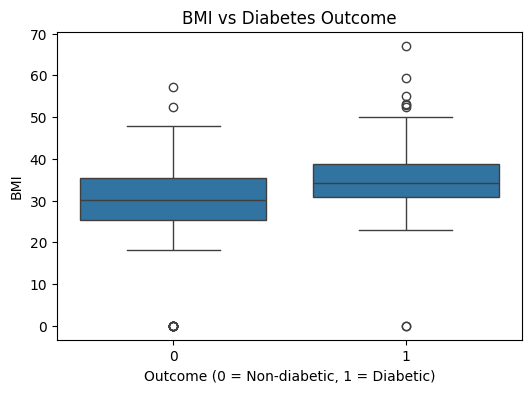

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=dataset)
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('BMI')
plt.show()

In [ ]:
dataset = dataset[dataset['BMI'] > 0]

Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[(dataset['BMI'] >= lower_bound) & (dataset['BMI'] <= upper_bound)]

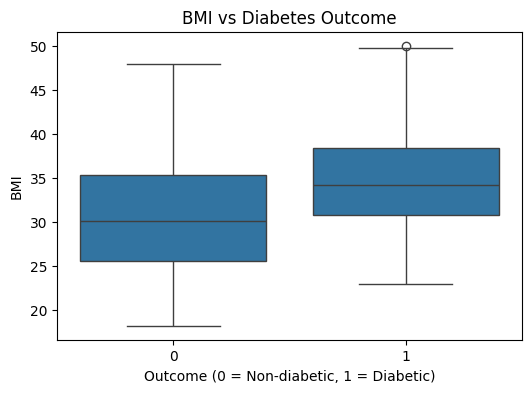

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=dataset)
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('BMI')
plt.show()

# Train Test Testing

In [ ]:
X=dataset.iloc[:,:8].values
y=dataset.iloc[:,-1].values

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10,shuffle=True)


# Train Random Forest model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# KNN Classifier

### Cross Validation to find k

In [ ]:
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_range[cv_scores.index(max(cv_scores))]
best_k

21

In [ ]:
knn=KNeighborsClassifier(n_neighbors=21, metric="minkowski", p=2)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
y_pred=knn.predict(X_test)

# Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[49,  3],
       [13, 10]])

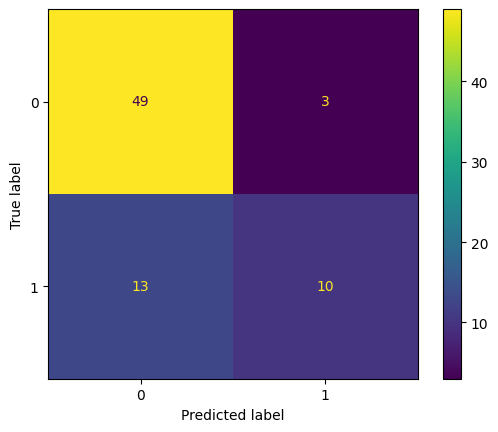

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.94      0.86        52\n           1       0.77      0.43      0.56        23\n\n    accuracy                           0.79        75\n   macro avg       0.78      0.69      0.71        75\nweighted avg       0.78      0.79      0.77        75\n'

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7866666666666666
